In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Pitch Report

Average Results:
Precision: 0.292
Recall: 0.438
F1: 0.344
Onset Precision: 0.353
Onset Recall: 0.300
Onset F1: 0.450
Onset-Offset F1: 0.201

In [5]:
# compute summaries
df = pd.read_csv("evaluation_results_basic_pitch.csv")
summary = df.describe()[["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"]]
summary

,Precision,Recall,F1,Onset F1,Onset-Offset F1
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.292179,0.438336,0.344203,0.449708,0.201455
std,0.138931,0.158791,0.144762,0.151088,0.131407
min,0.000000,0.000000,0.000000,0.037037,0.000000
25%,0.201250,0.335526,0.253074,0.368421,0.099804
50%,0.293611,0.445906,0.344828,0.445906,0.195135
75%,0.362013,0.541667,0.415583,0.541667,0.263770
max,0.600000,0.750000,0.666667,0.750000,0.518519


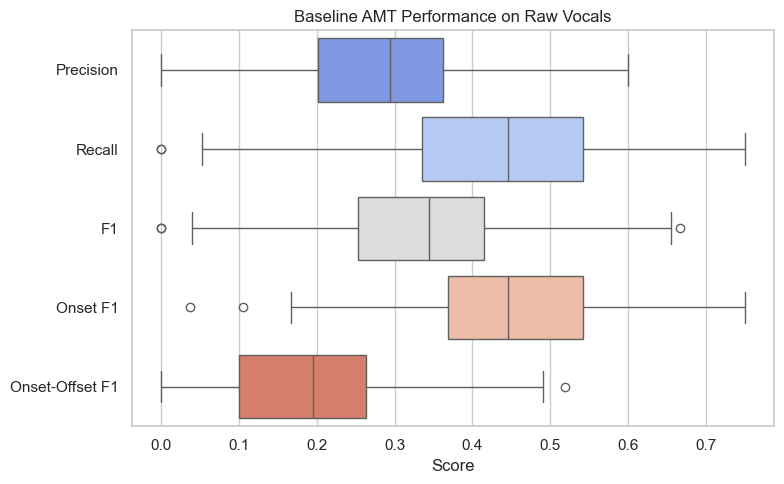

In [6]:
# visualize
# Plot mean accuracy across files
sns.set(style="whitegrid")
metrics = ["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[metrics], orient="h", palette="coolwarm")
plt.title("Baseline AMT Performance on Raw Vocals")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

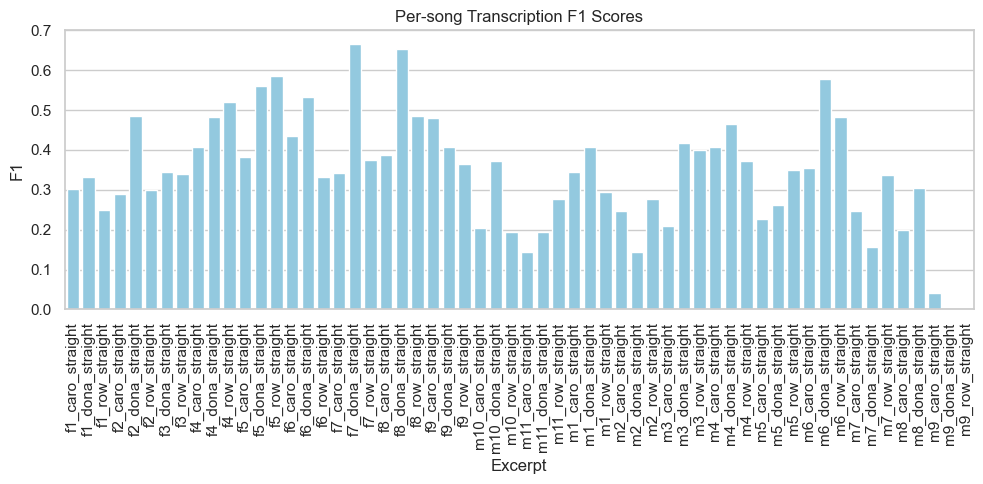

In [7]:
# You can also show per-song F1
plt.figure(figsize=(10, 5))
sns.barplot(x="Filename", y="F1", data=df, color="skyblue")
plt.xticks(rotation=90)
plt.title("Per-song Transcription F1 Scores")
plt.ylabel("F1")
plt.xlabel("Excerpt")
plt.tight_layout()
plt.show()

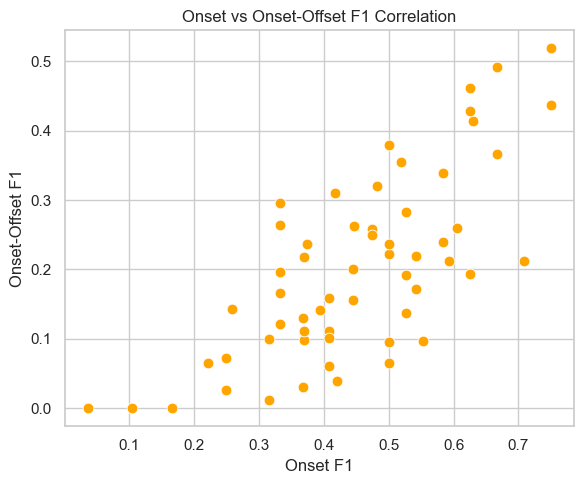

In [10]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Onset F1", y="Onset-Offset F1", data=df, s=60, color="orange")
plt.title("Onset vs Onset-Offset F1 Correlation")
plt.xlabel("Onset F1")
plt.ylabel("Onset-Offset F1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
corr = df["Onset F1"].corr(df["Onset-Offset F1"])
print(f"Correlation: {corr:.2f}")

Correlation: 0.73


In [ ]:
# # Visualizes pitch accuracy vs onset deviation per note — great for diagnosing model weaknesses.
# import mir_eval
# import numpy as np
#
# # Assuming ref_intervals, ref_pitches, est_intervals, est_pitches are arrays from one sample
# onset_diffs = est_intervals[:,0] - ref_intervals[:,0]
# pitch_diffs = est_pitches - ref_pitches
#
# plt.figure(figsize=(6, 5))
# plt.scatter(onset_diffs * 1000, pitch_diffs, alpha=0.6)
# plt.axvline(0, color='gray', linestyle='--')
# plt.axhline(0, color='gray', linestyle='--')
# plt.xlabel("Onset Error (ms)")
# plt.ylabel("Pitch Error (MIDI steps)")
# plt.title("Note-level Timing and Pitch Deviation")
# plt.tight_layout()
# plt.show()

In [ ]:
# If your metadata includes a Singer column, you can average metrics per singer:
# I can use this to show performance across M vs F singing voices.

## MT3 Report
Average Results:
Precision: 0.336
Recall: 0.344
F1: 0.327
Onset Precision: 0.451
Onset Recall: 0.455
Onset F1: 0.484
Onset-Offset F1: 0.179

In [16]:
# compute summaries
df = pd.read_csv("evaluation_results_MT3.csv")
summary = df.describe()[["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"]]
summary

,Precision,Recall,F1,Onset F1,Onset-Offset F1
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.335634,0.343584,0.327146,0.484414,0.179082
std,0.167196,0.154142,0.151559,0.159657,0.111052
min,0.000000,0.000000,0.000000,0.052632,0.000000
25%,0.229219,0.259259,0.248858,0.409722,0.100862
50%,0.375000,0.370370,0.326176,0.522417,0.186147
75%,0.444444,0.447368,0.427062,0.592593,0.244211
max,0.769231,0.631579,0.636364,0.710526,0.409091


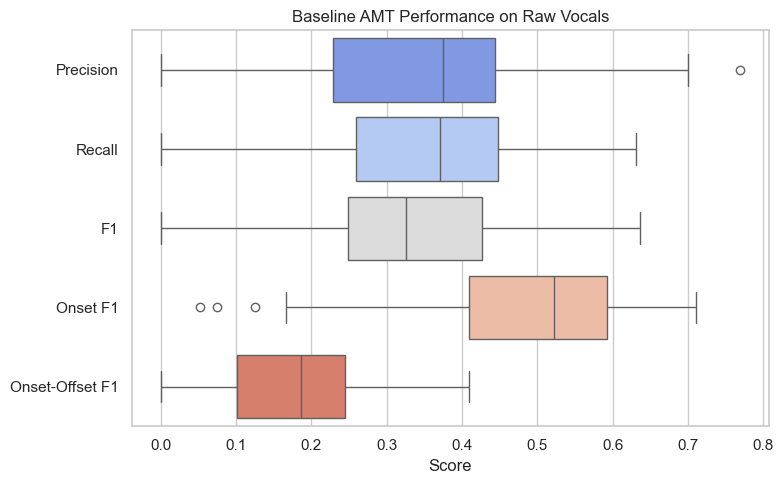

In [17]:
# visualize
# Plot mean accuracy across files
sns.set(style="whitegrid")
metrics = ["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[metrics], orient="h", palette="coolwarm")
plt.title("Baseline AMT Performance on Raw Vocals")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

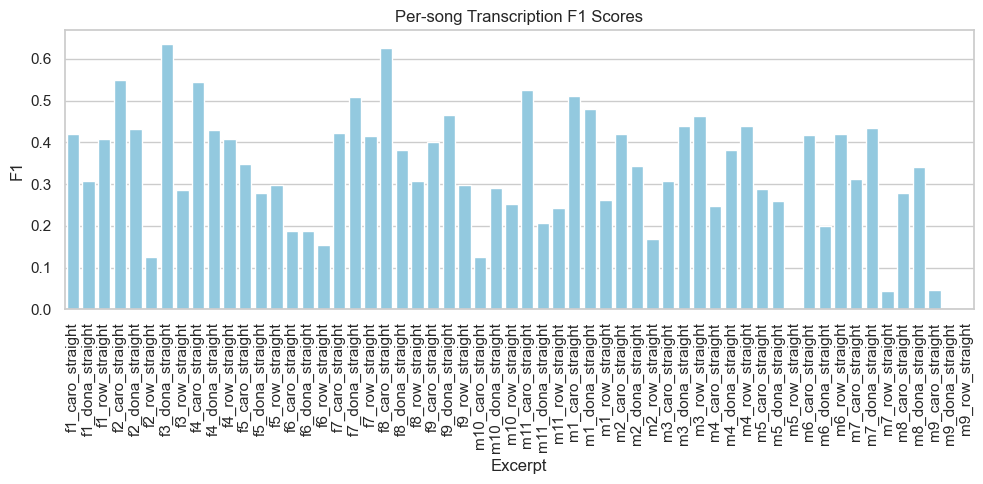

In [18]:
# You can also show per-song F1
plt.figure(figsize=(10, 5))
sns.barplot(x="Filename", y="F1", data=df, color="skyblue")
plt.xticks(rotation=90)
plt.title("Per-song Transcription F1 Scores")
plt.ylabel("F1")
plt.xlabel("Excerpt")
plt.tight_layout()
plt.show()

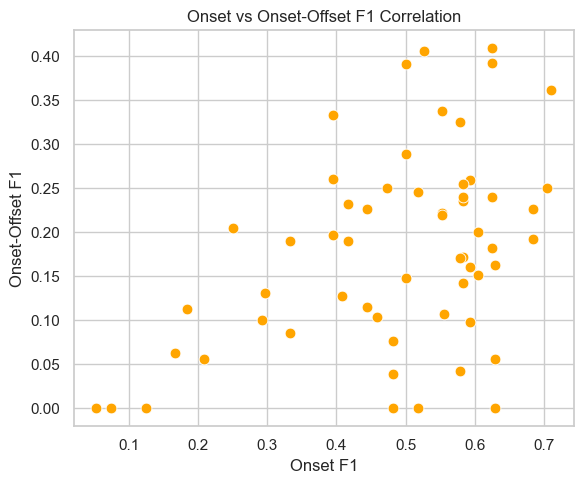

In [19]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Onset F1", y="Onset-Offset F1", data=df, s=60, color="orange")
plt.title("Onset vs Onset-Offset F1 Correlation")
plt.xlabel("Onset F1")
plt.ylabel("Onset-Offset F1")
plt.grid(True)
plt.tight_layout()
plt.show()

###

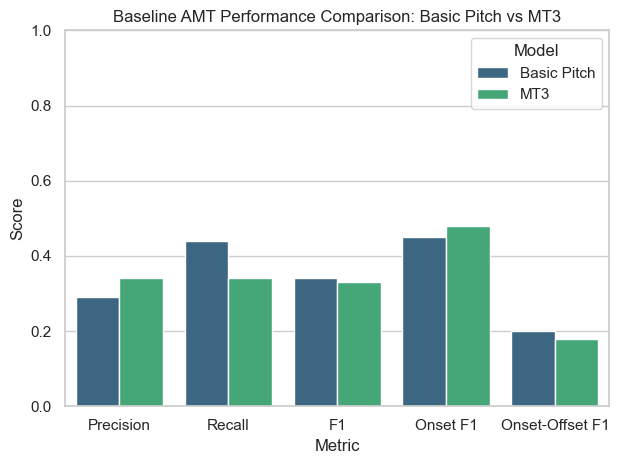

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "Metric": ["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"],
    "Basic Pitch": [0.29, 0.44, 0.34, 0.45, 0.20],
    "MT3": [0.34, 0.34, 0.33, 0.48, 0.18]
}
df = pd.DataFrame(data).melt(id_vars="Metric", var_name="Model", value_name="Score")

sns.barplot(data=df, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Baseline AMT Performance Comparison: Basic Pitch vs MT3")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Results Interpretation Figures

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import pretty_midi

# Load your evaluation data
basic_pitch_df = pd.read_csv("evaluation_results_basic_pitch.csv")
mt3_df = pd.read_csv("evaluation_results_MT3.csv")

# Add model column
basic_pitch_df["Model"] = "Basic Pitch"
mt3_df["Model"] = "MT3"

# Combine for unified plotting
df_all = pd.concat([basic_pitch_df, mt3_df], ignore_index=True)

sns.set(style="whitegrid", font_scale=1.1)

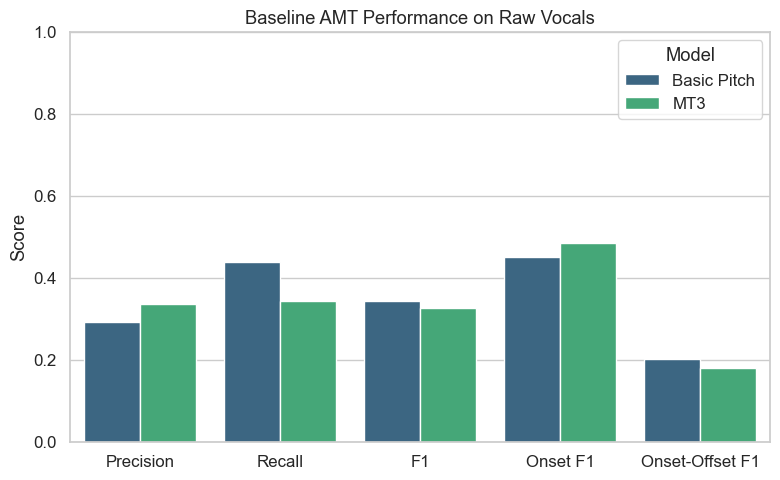

In [22]:
# Grouped Bar Plot — Baseline Performance Comparison (Fig 1)
# Shows mean performance across key metrics for both models.
metrics = ["Precision", "Recall", "F1", "Onset F1", "Onset-Offset F1"]
mean_scores = df_all.groupby("Model")[metrics].mean().reset_index()
df_plot = mean_scores.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Baseline AMT Performance on Raw Vocals")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

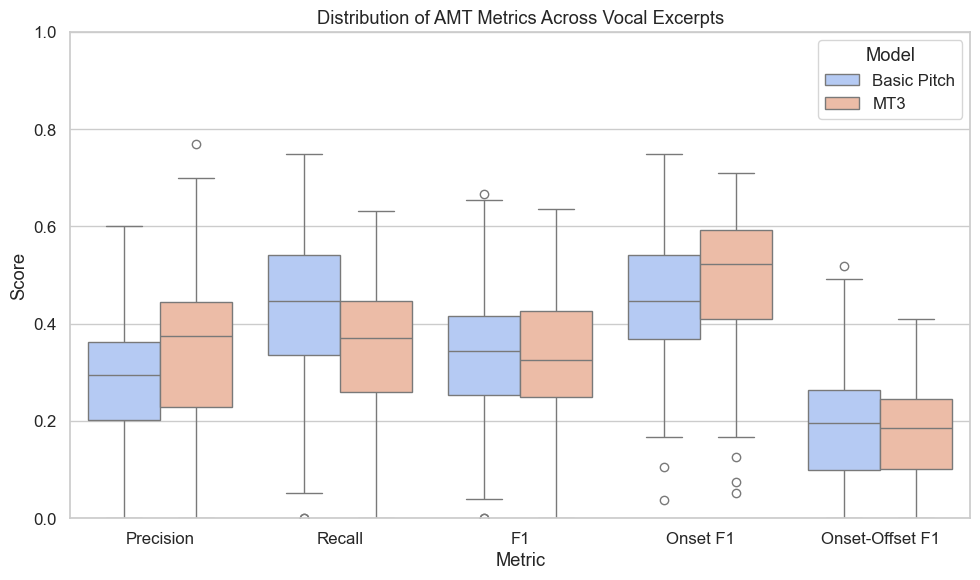

In [24]:
# Boxplots — Metric Distribution Across Excerpts (Fig 2)
# Visualizes performance variability for each model.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all.melt(id_vars="Model", value_vars=metrics), x="variable", y="value", hue="Model",
            palette="coolwarm")
plt.title("Distribution of AMT Metrics Across Vocal Excerpts")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

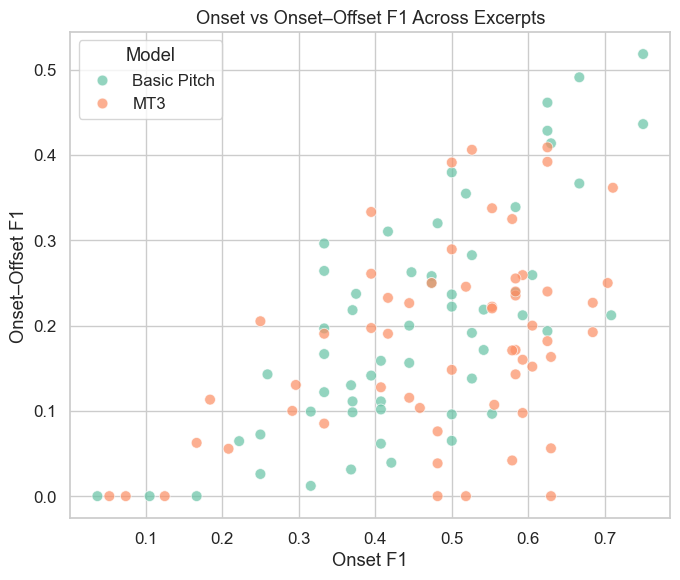

In [25]:
# Scatter Plot — Onset F1 vs Onset–Offset F1 (Fig 3)
# Shows the relationship between onset accuracy and full note duration accuracy.
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df_all, x="Onset F1", y="Onset-Offset F1",
                hue="Model", s=60, alpha=0.7, palette="Set2")
plt.title("Onset vs Onset–Offset F1 Across Excerpts")
plt.xlabel("Onset F1")
plt.ylabel("Onset–Offset F1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
for model in ["Basic Pitch", "MT3"]:
    subset = df_all[df_all["Model"] == model]
    corr = subset["Onset F1"].corr(subset["Onset-Offset F1"])
    print(f"{model} correlation: {corr:.2f}")

Basic Pitch correlation: 0.73
MT3 correlation: 0.44


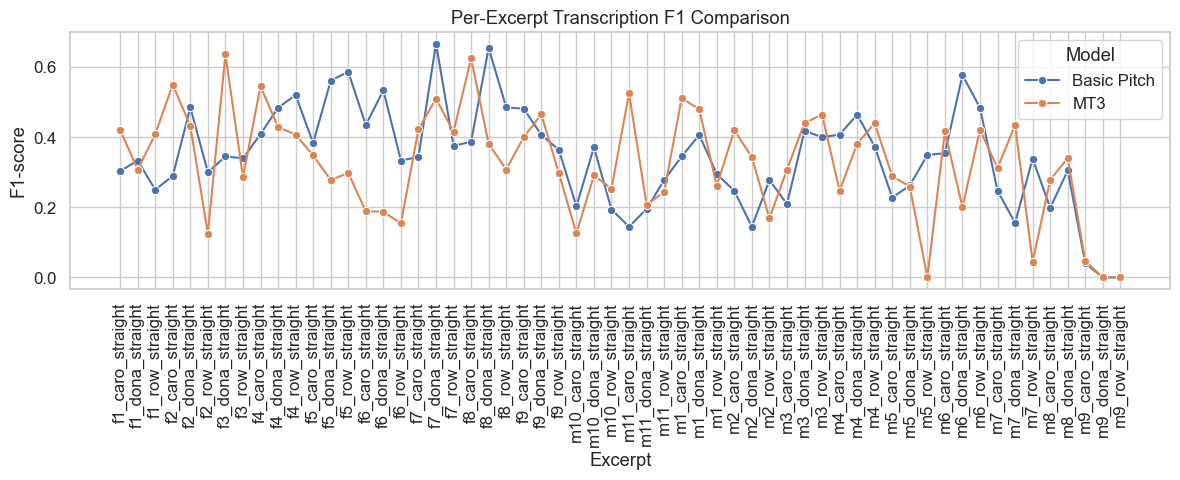

In [27]:
# Per-Excerpt Line Plot — Transcription F1 per Excerpt (Fig 4)
# Shows which excerpts are hardest for each model.
# Sort by average F1 for visual clarity
order = df_all.groupby("Filename")["F1"].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_all, x="Filename", y="F1", hue="Model", marker="o")
plt.xticks(rotation=90)
plt.title("Per-Excerpt Transcription F1 Comparison")
plt.ylabel("F1-score")
plt.xlabel("Excerpt")
plt.tight_layout()
plt.show()

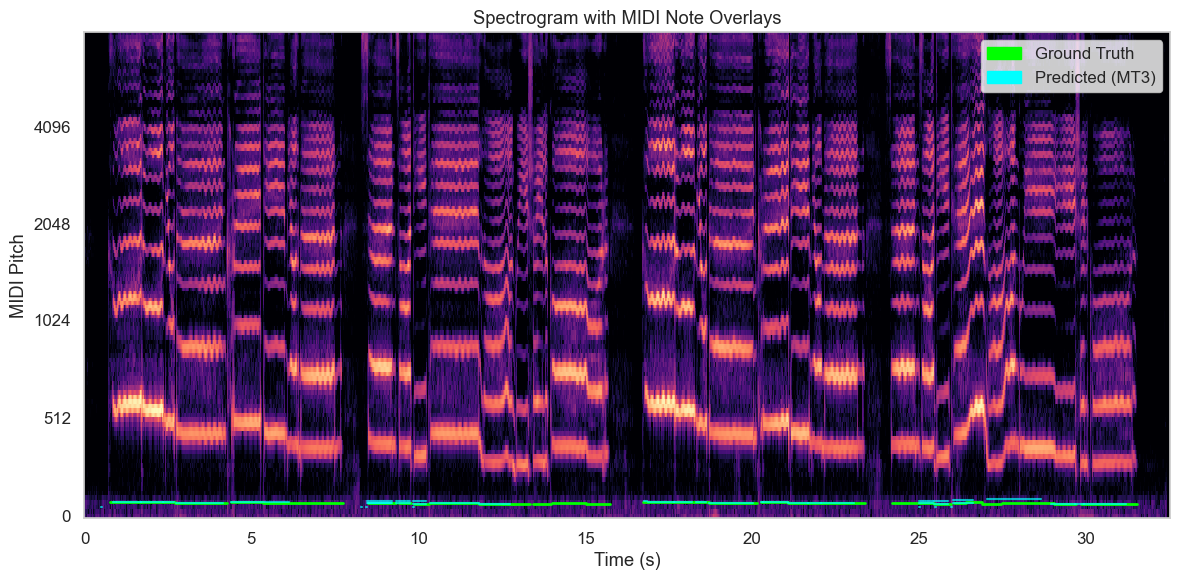

In [31]:
# Spectrogram Overlay — Ground Truth vs Transcribed Notes (Fig 5)
# This one gives a visual alignment check for a single excerpt, showing the audio spectrogram with overlaid note events from ground truth and prediction.
import matplotlib.patches as mpatches

# Example file paths (replace with your own)
audio_path = "../dataset/wav/f1_caro_straight.wav"
gt_midi = "../dataset/midi/f1_caro_straight.mid"
pred_midi = "../amt_dataset/MT3/f1_caro_straight.mid"

# Load audio & compute mel spectrogram
y, sr = librosa.load(audio_path, sr=None)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
plt.title("Spectrogram with MIDI Note Overlays")

# Load MIDI files
gt = pretty_midi.PrettyMIDI(gt_midi)
pred = pretty_midi.PrettyMIDI(pred_midi)

# Plot GT notes
for inst in gt.instruments:
    for note in inst.notes:
        plt.plot([note.start, note.end], [note.pitch, note.pitch],
                 color='lime', linewidth=2)

# Plot predicted notes
for inst in pred.instruments:
    for note in inst.notes:
        plt.plot([note.start, note.end], [note.pitch, note.pitch],
                 color='cyan', linewidth=1.5, alpha=0.7)

# Legend
gt_patch = mpatches.Patch(color='lime', label='Ground Truth')
pred_patch = mpatches.Patch(color='cyan', label='Predicted (MT3)')
plt.legend(handles=[gt_patch, pred_patch], loc='upper right')

plt.ylabel("MIDI Pitch")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

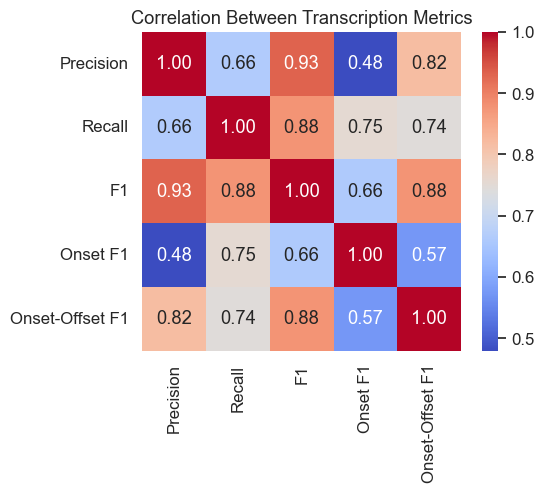

In [32]:
# Metric Correlation Heatmap (Fig 6)
# A nice high-level visualization showing inter-metric relationships.
corr = df_all[metrics].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between Transcription Metrics")
plt.tight_layout()
plt.show()